In [23]:
import sys, os
sys.path.append('../')

In [24]:
import numpy as np
import matplotlib;

matplotlib.use('agg')
from matplotlib.image import imread
import matplotlib.pyplot as plt
from skimage.segmentation import (morphological_chan_vese,
                                  checkerboard_level_set)
import sys
import os
import re

In [25]:
%matplotlib inline

In [156]:
regex = re.compile(r'\d+')
in_folder = '/storage/yw18581/data/Pos2_time1934_8bit_cropped/top_right_6/'
f_no = 2
dist = 20
out_folder = '/storage/yw18581/data/Pos2_time1934_8bit_cropped/test_mask'
# data_dir = '/Users/cdesio/UoB/Jordan'
fname_key = 'AVG_top_right_6'

In [157]:
split = fname_key.split("_")
split.append(str(f_no).zfill(2))
img_path = os.path.join(in_folder, '{}.tif'.format('_'.join(split)))
image = imread(img_path)
print(img_path)
print("import image and select profile")

/storage/yw18581/data/Pos2_time1934_8bit_cropped/top_right_6/AVG_top_right_6_02.tif
import image and select profile


In [158]:
def calculate_profile(image):
    # Initial level set
    init_ls = checkerboard_level_set(image.shape, 5)
    # List with intermediate results for plotting the evolution

    ls = morphological_chan_vese(image, 10, init_level_set=init_ls, smoothing=5)
    return ls

In [159]:
ls = calculate_profile(image)
print("select leaf")

select leaf


In [160]:
def show_img_cont(image,ls):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.imshow(image, cmap="gray")
    #ax.set_axis_off()
    ax.contour(ls,[0.5], colors='r')
    #ax.set_title("Morphological ACWE segmentation", fontsize=12)
    plt.show()
    return

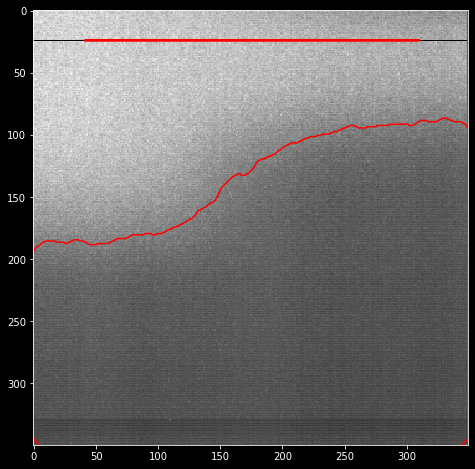

In [161]:
show_img_cont(image, ls)

In [162]:

def select_profile_2(array):
    arr = np.argwhere(array)
    y = arr[:, 0]
    X = arr[:, 1]
    y_uniques = np.unique(y)
    y_out = [np.max(X[y == yi]) for yi in y_uniques]
    return np.column_stack((y_uniques, y_out))

In [163]:
# leaf = select_profile(ls[1000:1280])
leaf = select_profile_2(ls[50:300])
leaf_position = np.min(leaf[:, 1])
print("calculated leaf position:{}".format(leaf_position))

calculated leaf position:332


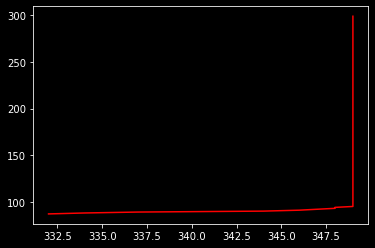

In [164]:

plt.plot(leaf[:,1], leaf[:,0]+50,c='r')
#plt.xlim(0,2400)
#plt.ylim(2800,0)

In [171]:
if leaf_position >= 330:
    ls_inv = (~ls.astype(bool)).astype(int)
    leaf = select_profile_2(ls_inv[450:2200])
    leaf_position = np.min(leaf[:, 1])
    print("new leaf position: {}".format(leaf_position))


ValueError: zero-size array to reduction operation minimum which has no identity

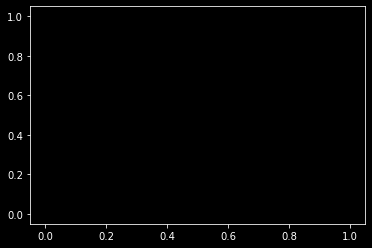

In [170]:
plt.plot(leaf[:,1], leaf[:,0]+50,c='r')
#plt.xlim(0,2400)
#plt.ylim(2800,0)

In [56]:
# test1
# for i, (j, k) in enumerate(leaf):
#    if k>leaf[i-1][1]+100:
#        leaf[i][1]=leaf[i-1][1] 
# test2
# for i, (j, k) in enumerate(leaf):
#    if i >3 and i < len(leaf)-3: 
#        if np.abs(k-leaf[i-1][1])>150:
#            leaf[i][1]=np.mean([leaf[i-3][1], leaf[i+3][1]])
# test3
index = []
for i, (j, k) in enumerate(leaf):
    if i < len(leaf) - 1:
        if np.abs(k - leaf[i + 1][1]) > 200 or np.abs(k - leaf[i + 1][1]) == 0:
            if leaf[i][1] >= leaf[i + 1][1]:
                index.append(i)
            elif leaf[i + 1][1] > leaf[i][1]:
                index.append(i + 1)
leaf = np.delete(leaf, index, axis=0)

print("check the borders")
if np.abs(leaf[-1][1] - leaf[-2][1] >= 200):
    print("found it")
    if leaf[-1][1] > leaf[-2][1]:
        print("and change it")
        leaf[-1][1] = leaf[-2][1]
        print(leaf[-1][1])
print("done")

# end test 3





check the borders
done


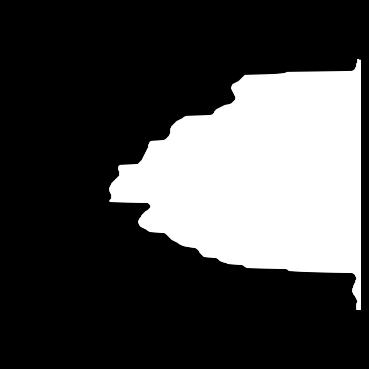

In [47]:
plt.figure(figsize=(350 / 96, 350 / 96), dpi=96)
plt.style.use('dark_background')
plt.axes([0, 0, 1, 1], frameon=False)
plt.plot(leaf[:, 1], leaf[:, 0] + 50, c='w', alpha=1)
plt.fill_betweenx(leaf[:, 0] + 50, leaf[:, 1], x2=350, color='w', alpha=1)
fig = plt.imshow(image, cmap="gray", alpha=0)
#plt.ylim(2800, 0)
#plt.xlim(0, 2400)
plt.box(False)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()
# plt.savefig("mask_only.tiff")
#plt.savefig(os.path.join(out_folder, '{}_{}mm_mask_{}.tiff'.format('_'.join(split), dist, leaf_position)))
plt.close('all')

